Problem Statement

Objective:

Develop a machine learning model to accurately identify fraudulent credit card transactions among a dataset of European cardholder transactions from the year 2023.

Background:
Credit card fraud is a major concern for financial institutions and cardholders alike, leading to significant financial losses and security issues. With the increasing volume of digital transactions, traditional rule-based systems are becoming less effective, necessitating the need for advanced, scalable, and efficient fraud detection solutions.

Dataset Description:
The dataset comprises over 550,000 records of credit card transactions made by European cardholders in 2023. It includes the following features:

id: Unique identifier for each transaction.
V1-V28: Anonymized features representing various aspects of each transaction, likely encompassing time, location, amount, and other transactional details.
Amount: The transaction amount.
Class: Binary label (1 for fraudulent, 0 for non-fraudulent transactions).


Expected Challenges:
Imbalanced Data, Anonymized Features, Model Interpretability.

Tasks:
Data Preprocessing: Address class imbalance using techniques like oversampling, undersampling, or SMOTE (Synthetic Minority Over-sampling Technique).

Feature Engineering: Derive new features or transform existing ones to improve model performance.

Model Selection: Experiment with various algorithms like Decision Trees, Random Forest, Gradient Boosting, Support Vector Machines, and Neural Networks.

Hyperparameter Tuning: Optimize model parameters for better performance.
Cross-Validation: Implement cross-validation to ensure the model’s robustness and generalizability.


Evaluate Model using various evaluation parameters.

_________________________________________________________

**Importing Libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

**Uploading files**

In [16]:
df = pd.read_csv('/content/drive/MyDrive/ML module end/creditcard_2023.csv')

**Data Inspection**

In [17]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [18]:
df.shape

(568630, 31)

In [19]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [21]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [22]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
df.duplicated().any()

False

Hence, we can conclude that there are no null or duplicate values

In [24]:
df.corr()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,...,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


In [25]:
corr=df.corr()[abs(df.corr())>0.5].round(2)
corr

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.00,NaN,NaN,-0.66,0.62,NaN,NaN,NaN,NaN,-0.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.86
V1,NaN,1.00,-0.56,NaN,NaN,0.52,NaN,0.57,NaN,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.51
V2,NaN,-0.56,1.00,-0.63,0.58,-0.63,NaN,-0.69,NaN,-0.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,-0.66,NaN,-0.63,1.00,-0.69,0.51,0.51,0.63,NaN,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.68
V4,0.62,NaN,0.58,-0.69,1.00,NaN,NaN,-0.59,NaN,-0.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74
V5,NaN,0.52,-0.63,0.51,NaN,1.00,NaN,0.59,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6,NaN,NaN,NaN,0.51,NaN,NaN,1.00,NaN,-0.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V7,NaN,0.57,-0.69,0.63,-0.59,0.59,NaN,1.00,NaN,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V8,NaN,NaN,NaN,NaN,NaN,NaN,-0.60,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V9,-0.51,0.55,-0.59,0.65,-0.68,NaN,NaN,0.60,NaN,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.59


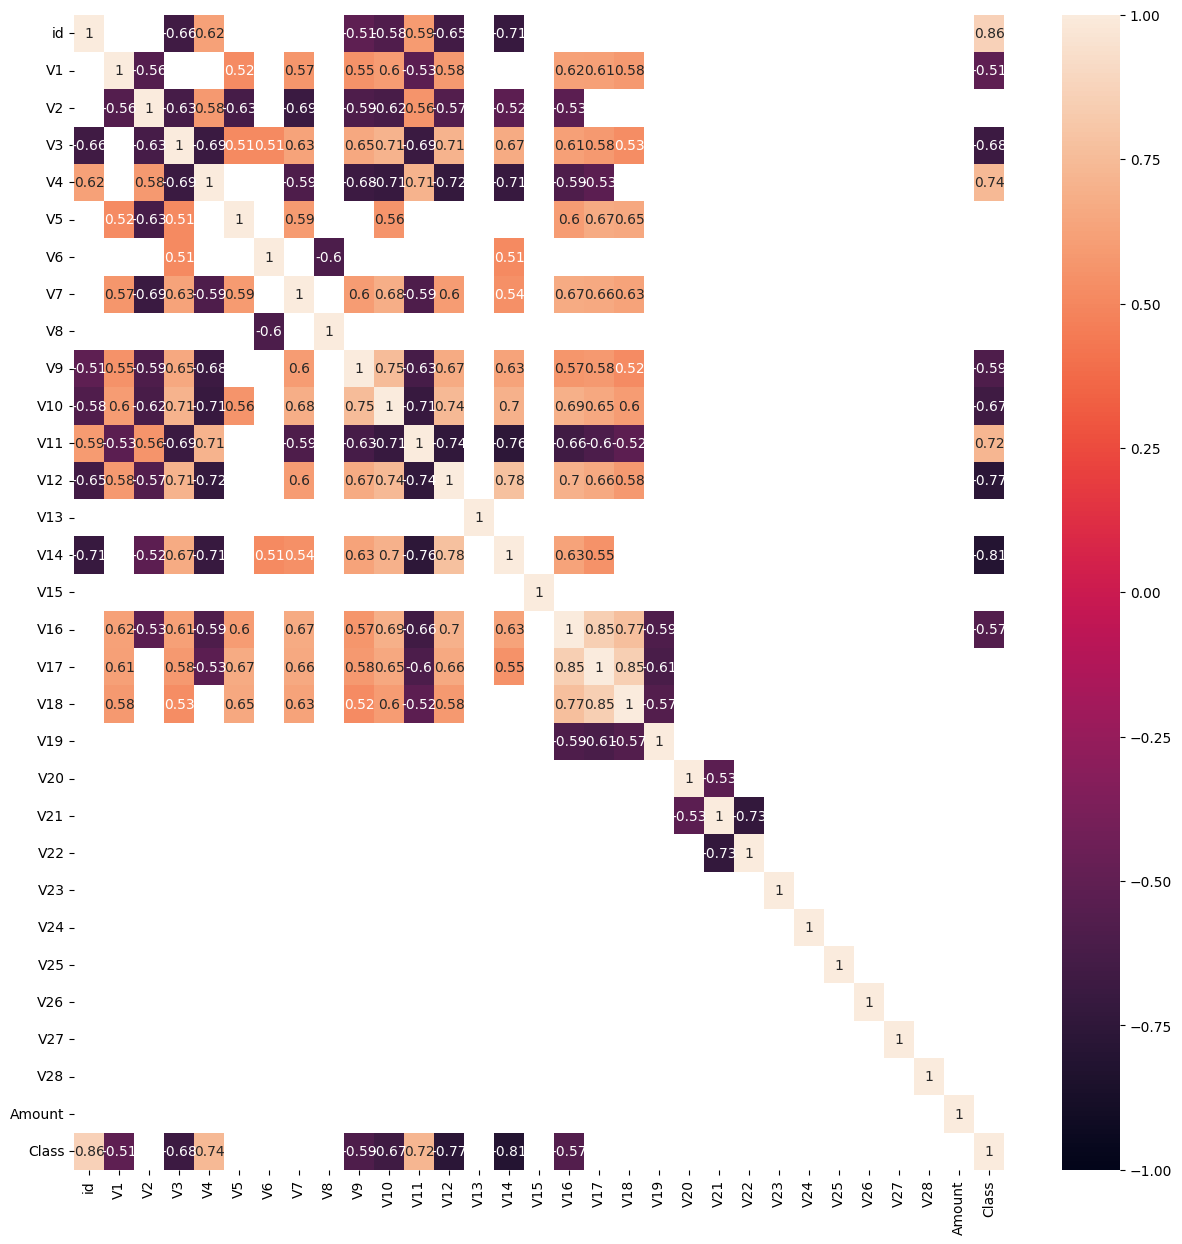

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1)
plt.show()

the above heatmap deicts good to strong colinearity

In [27]:
df=df.drop('id',axis=1)

In [28]:
df2=df[['V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16','Class']]

df of low to strong colinearity

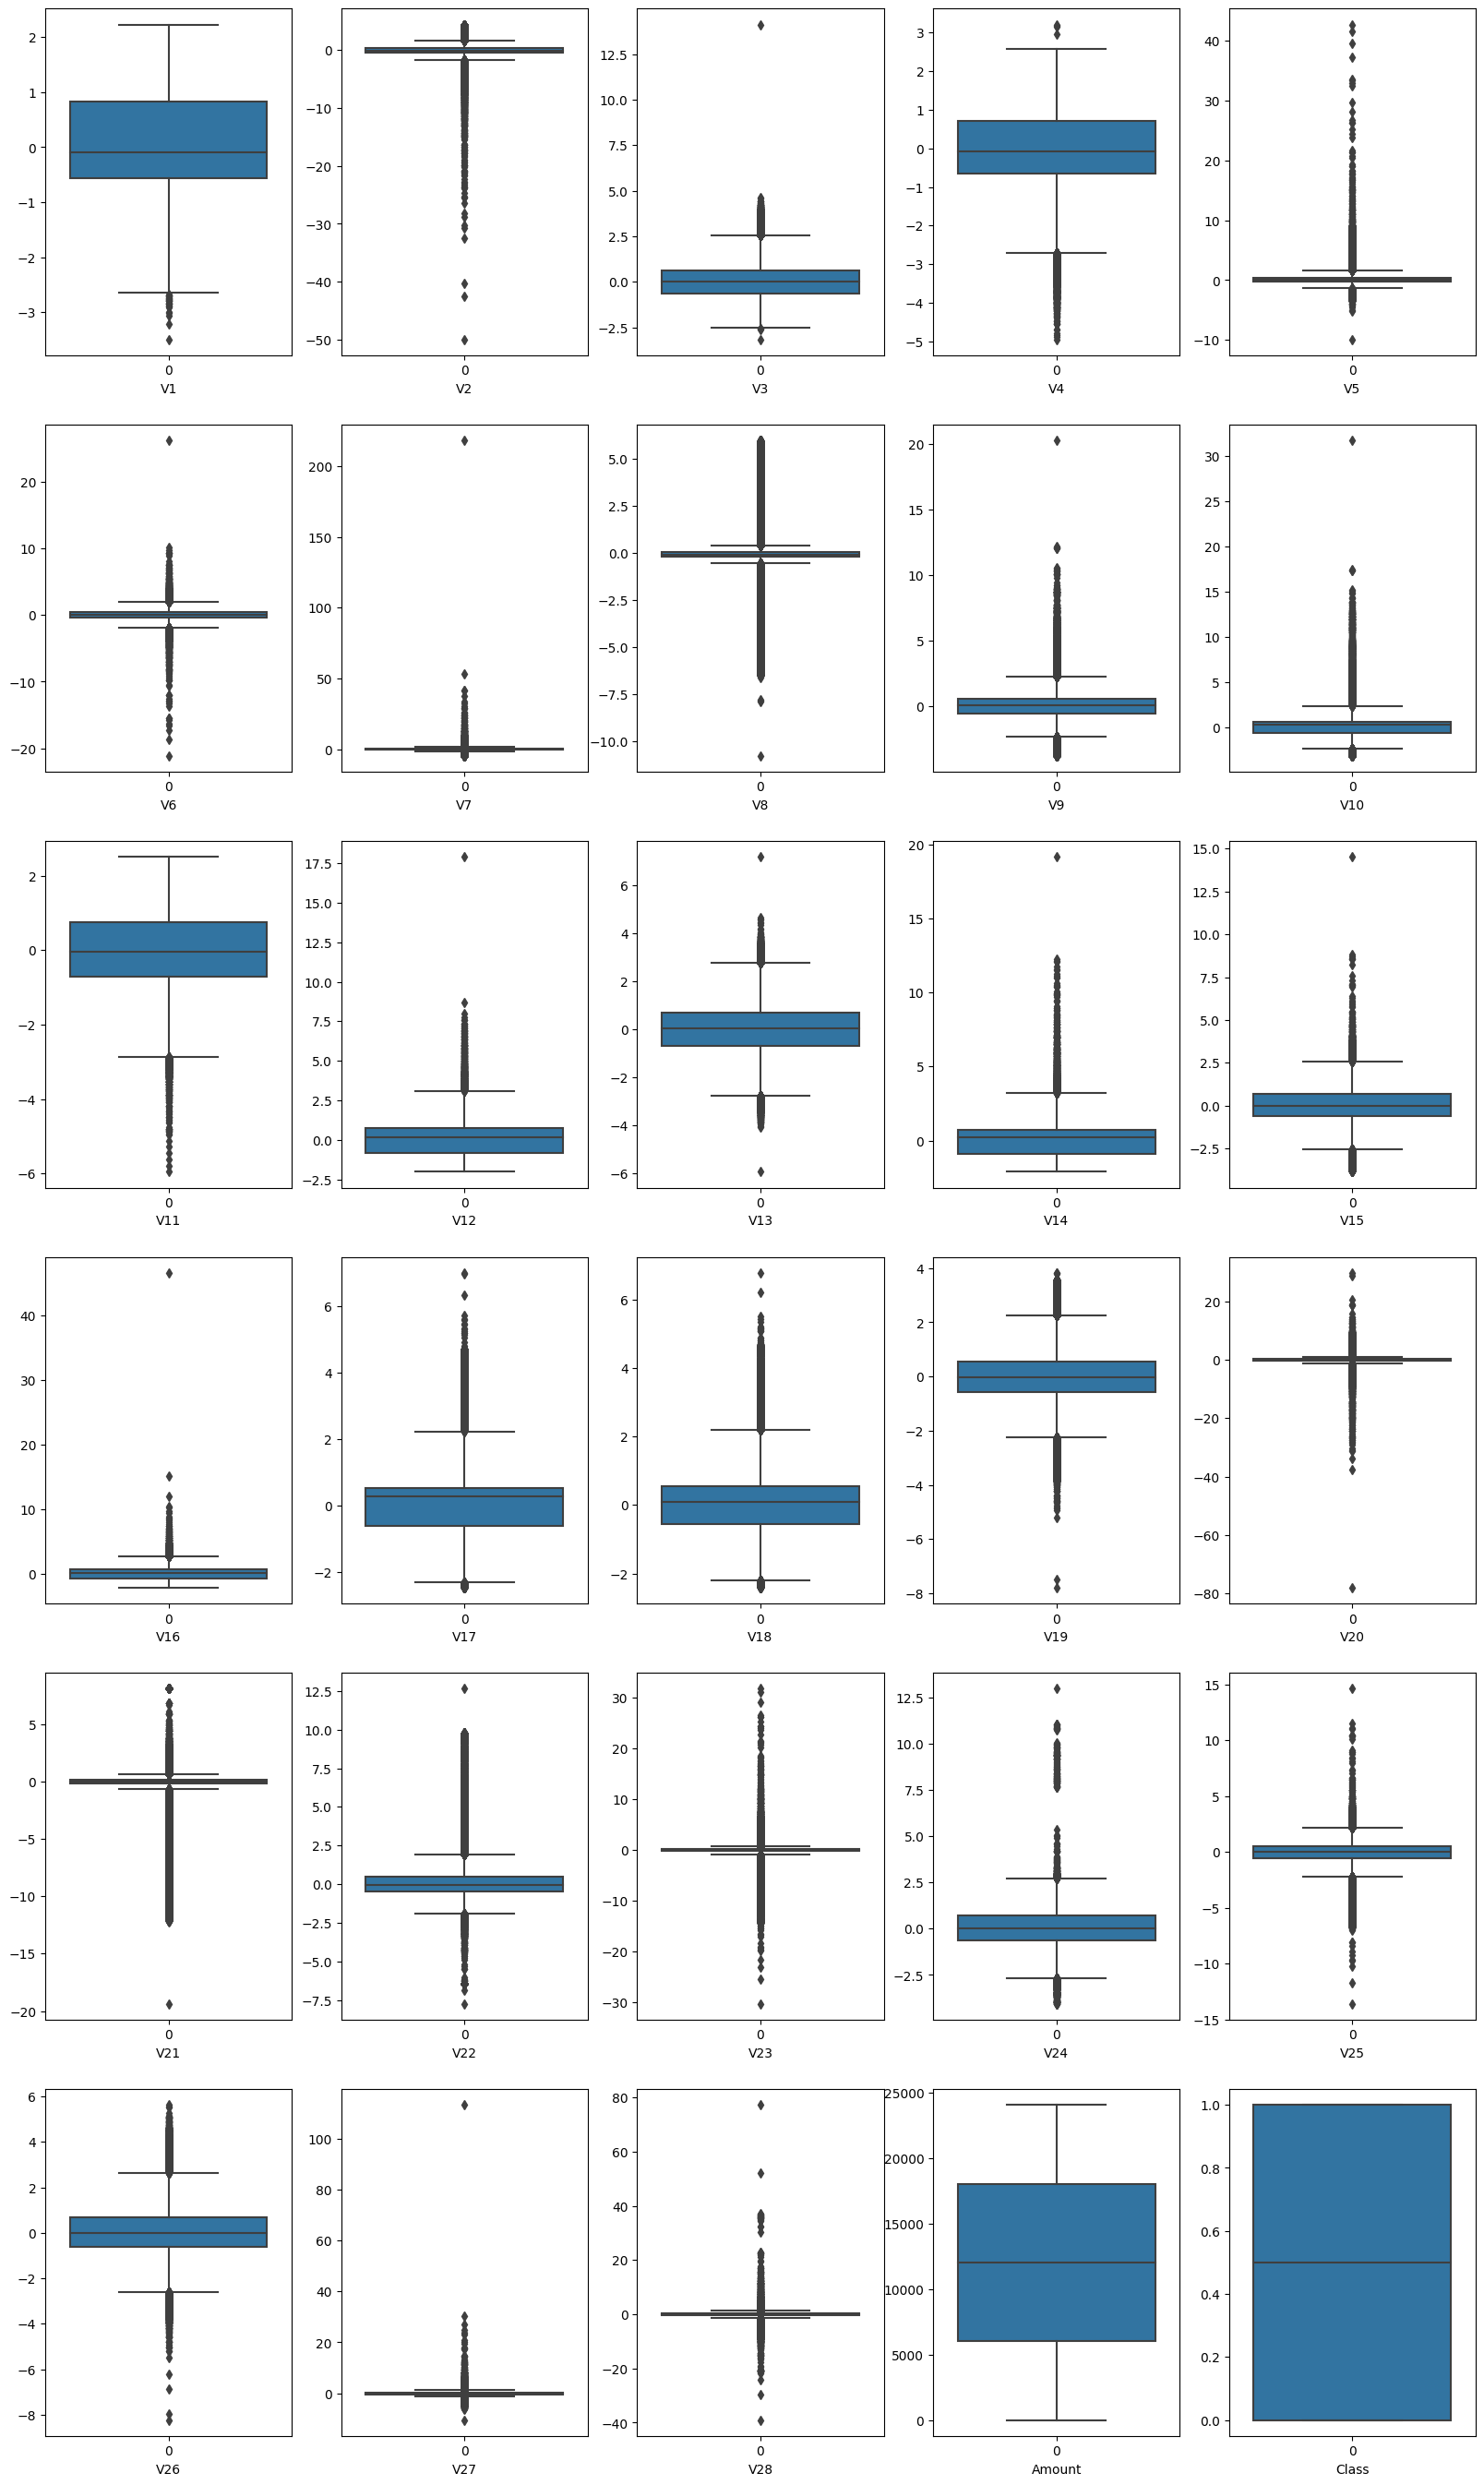

In [29]:
plt.figure(figsize=(20, 40))
for i, col in enumerate(df.columns):
    plt.subplot(7, 5, i+1)
    sns.boxplot(df[col])
    plt.xlabel(col)
plt.show()

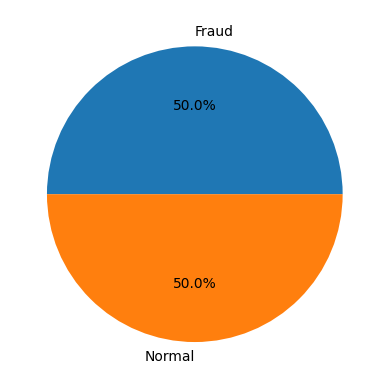

In [30]:
plt.pie(df['Class'].value_counts(), labels=['Fraud', 'Normal'], autopct='%1.1f%%')
plt.show()

In [31]:
df.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

Hence, we can say that the data is not biased or imbalanced

In [32]:
df.Amount.value_counts

<bound method IndexOpsMixin.value_counts of 0         17982.10
1          6531.37
2          2513.54
3          5384.44
4         14278.97
            ...   
568625     4394.16
568626     4653.40
568627    23572.85
568628    10160.83
568629    21493.92
Name: Amount, Length: 568630, dtype: float64>

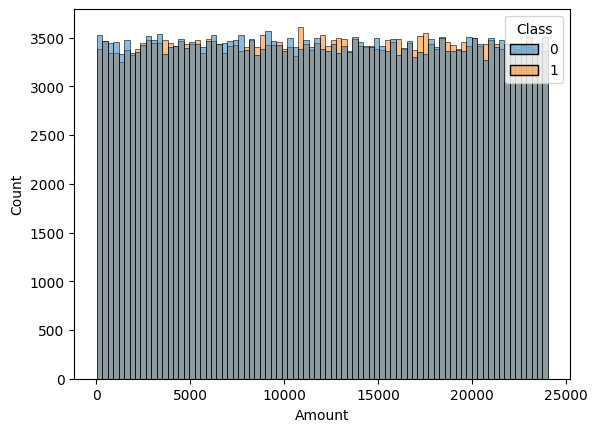

In [33]:
a=sns.histplot(data=df, x='Amount', hue='Class')


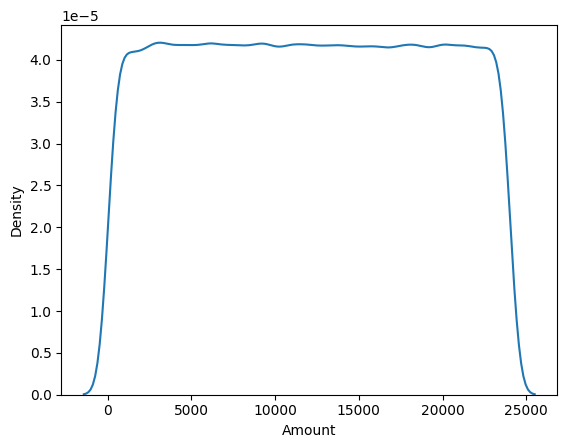

In [34]:
sns.kdeplot(data=df['Amount'])
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df.Class, test_size = 0.3, random_state = 42)

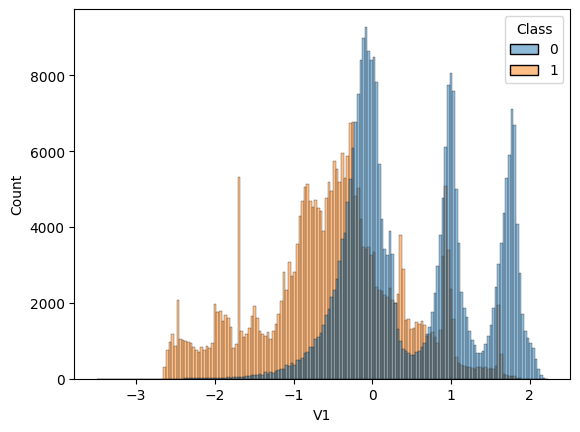

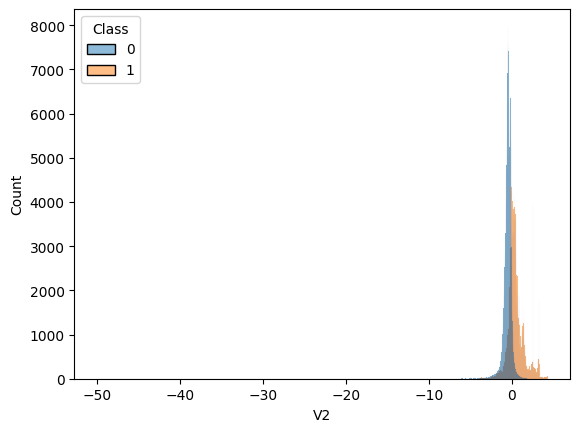

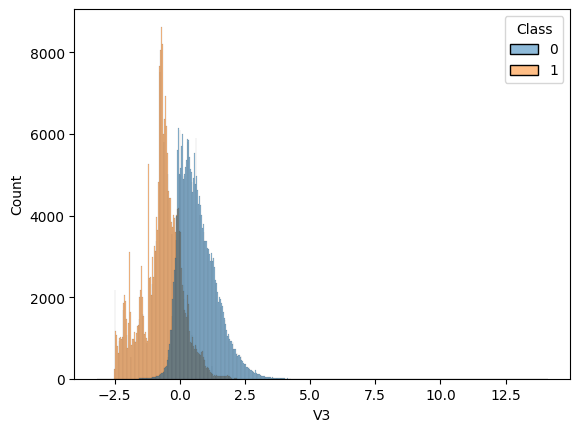

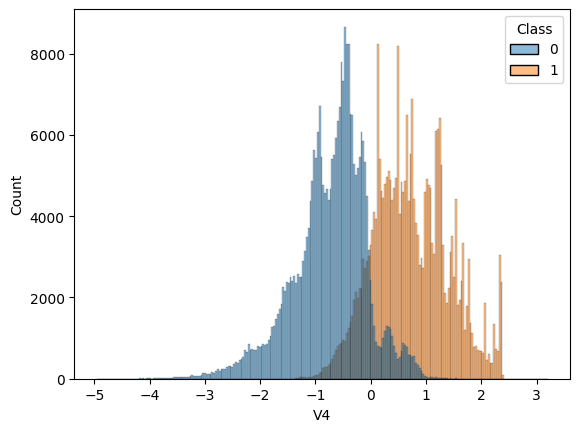

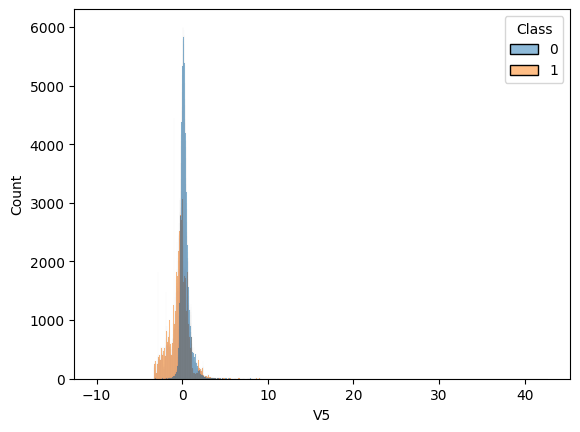

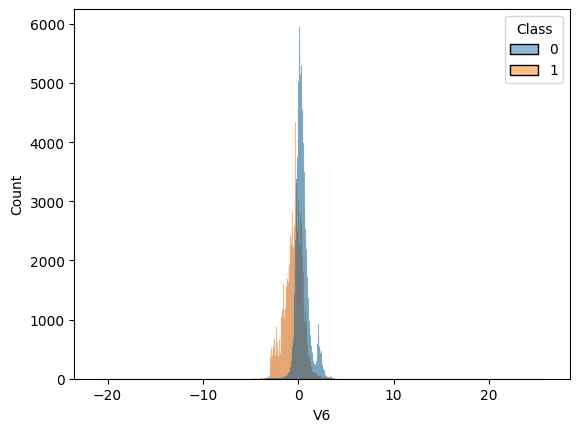

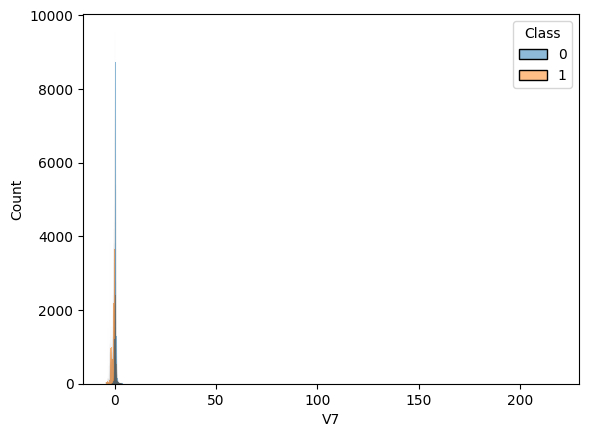

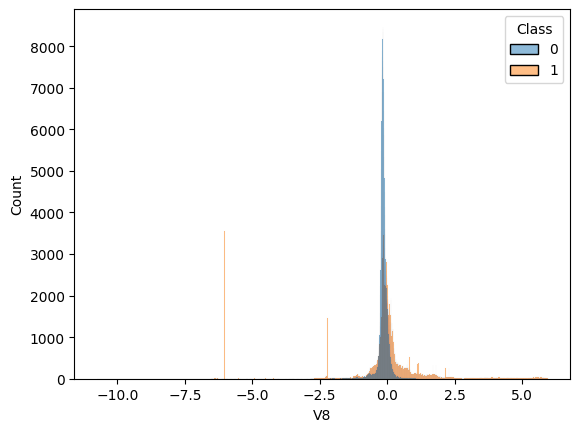

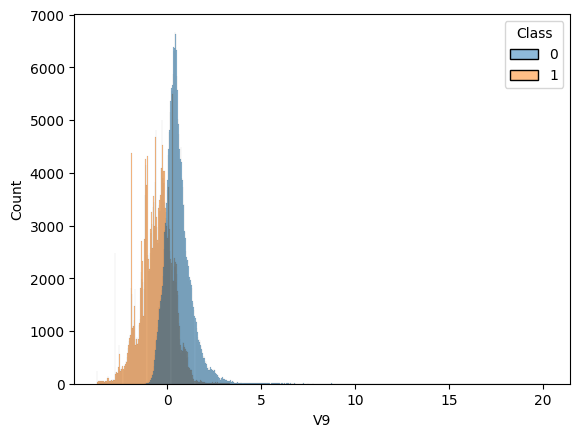

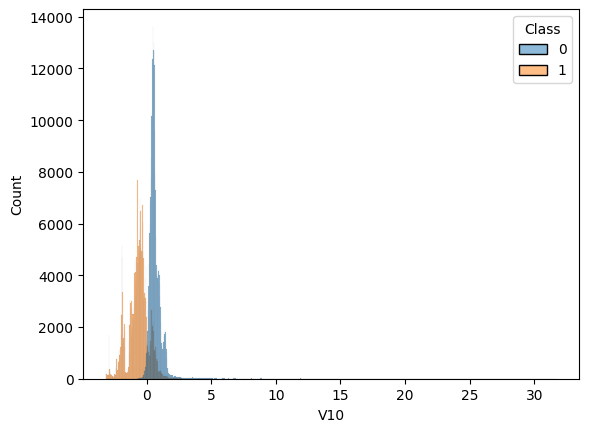

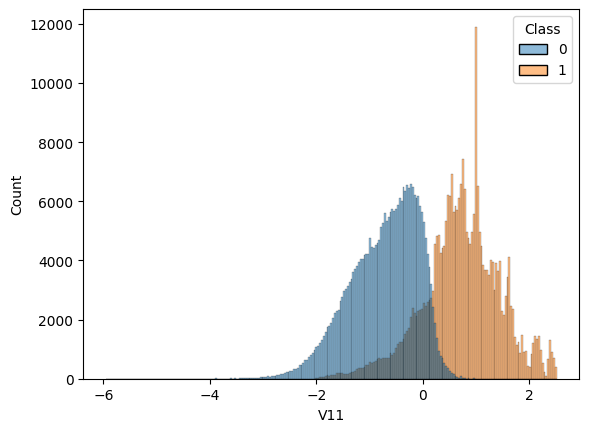

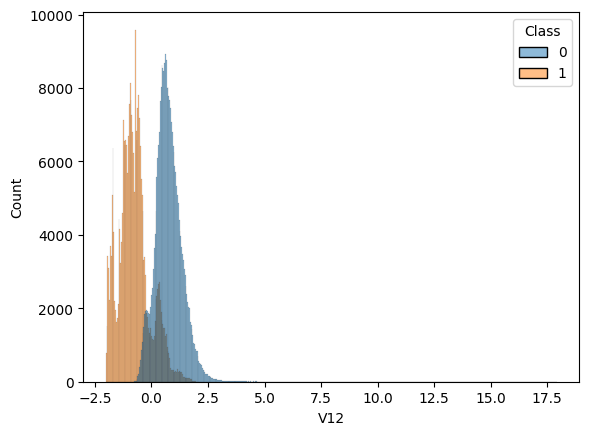

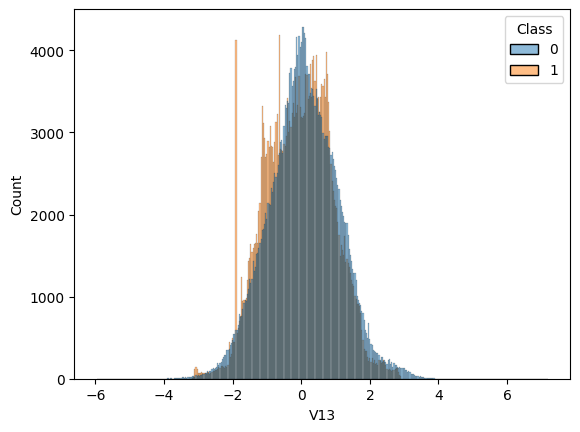

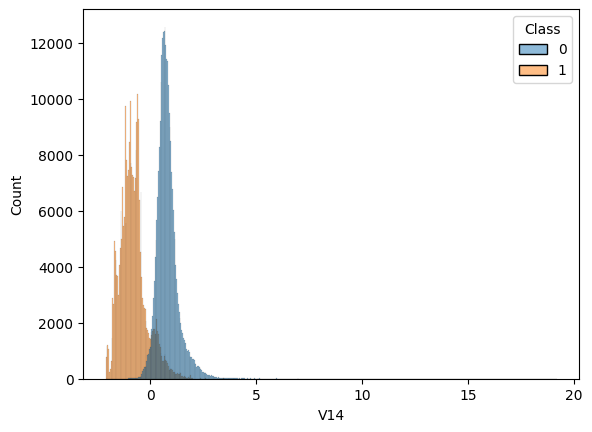

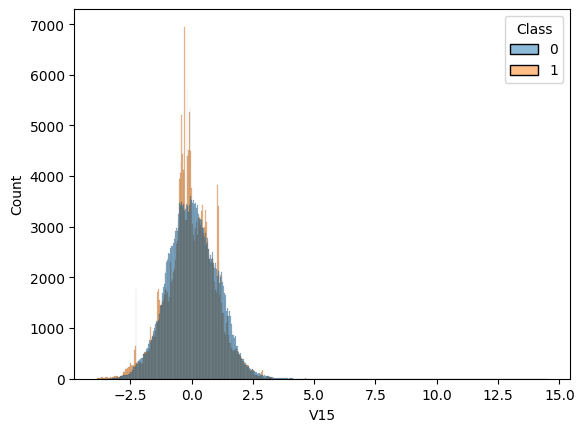

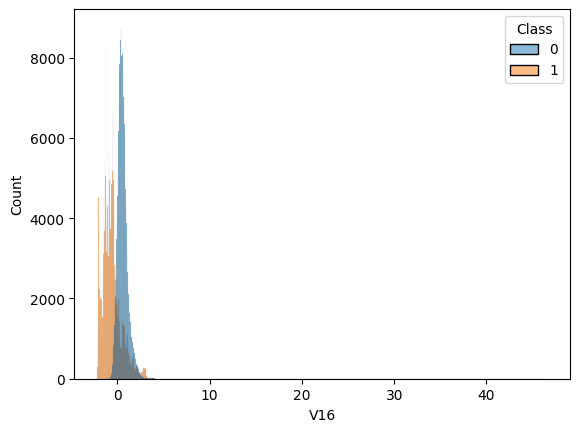

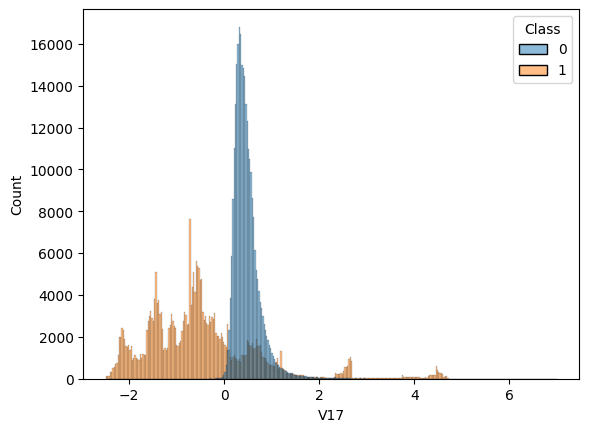

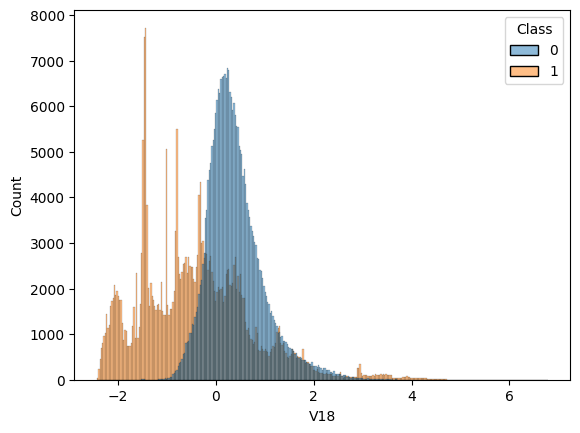

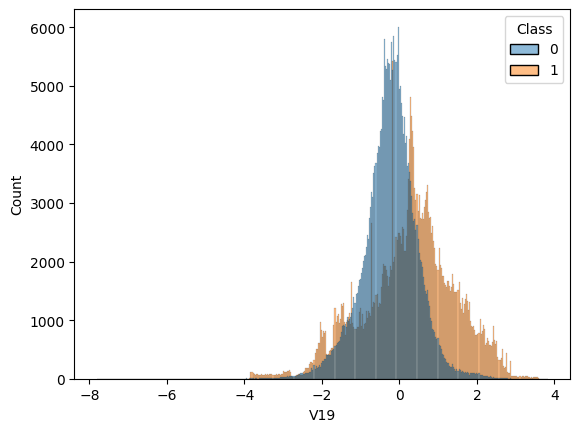

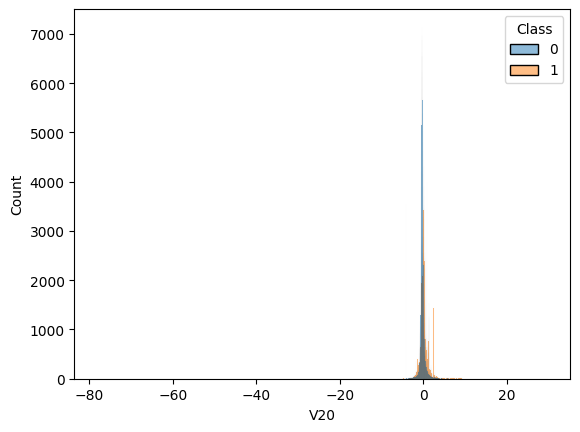

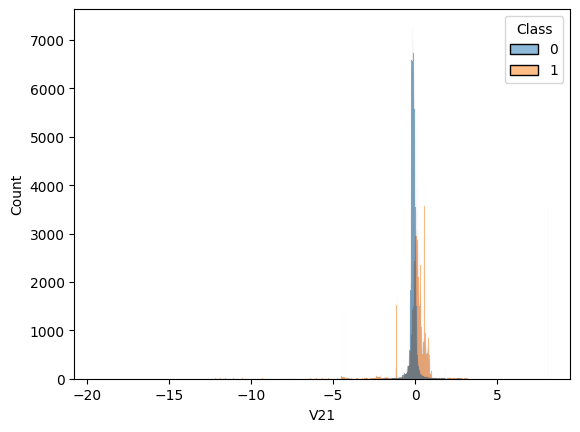

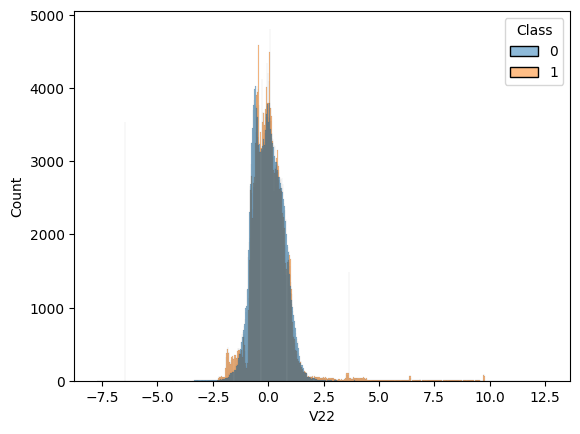

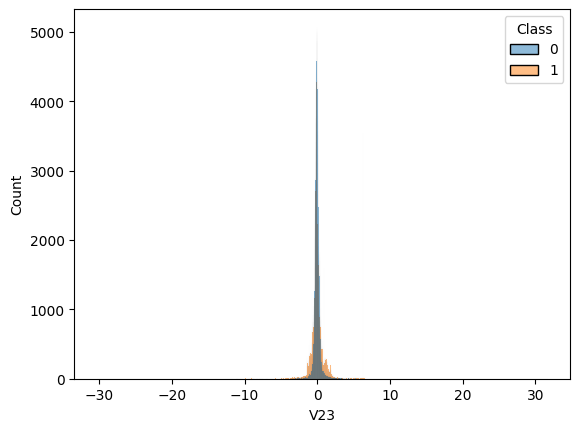

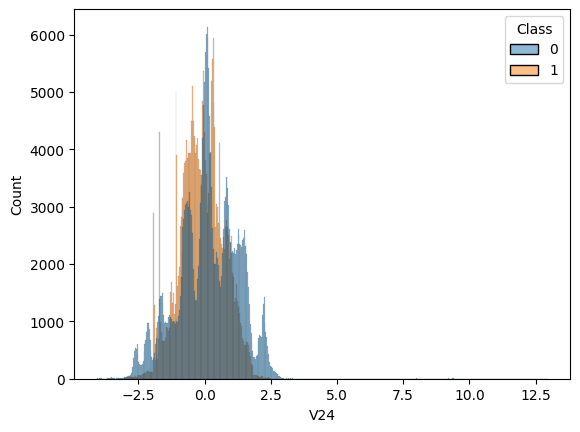

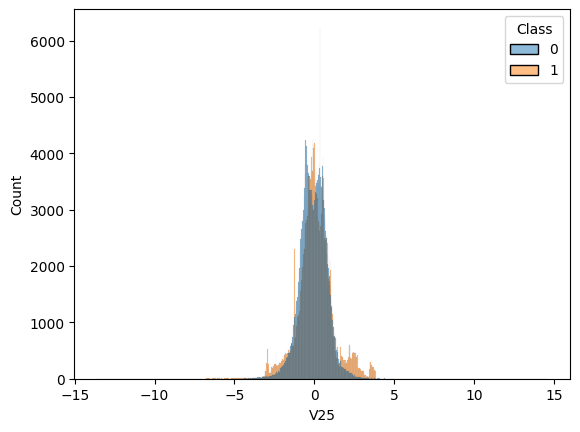

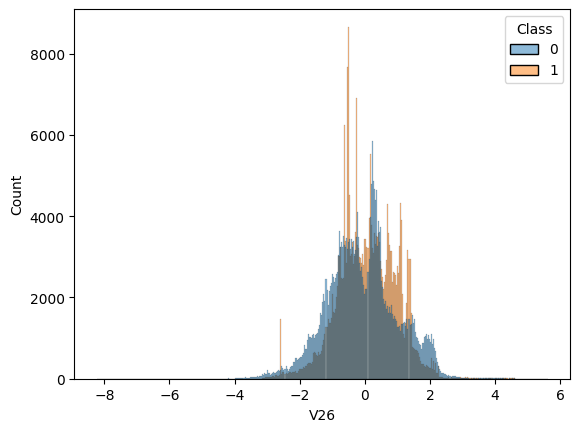

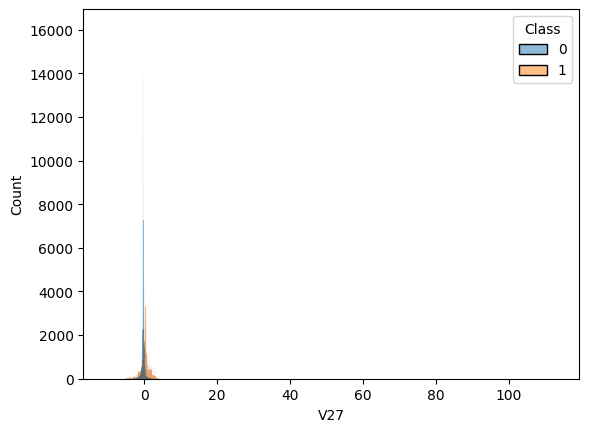

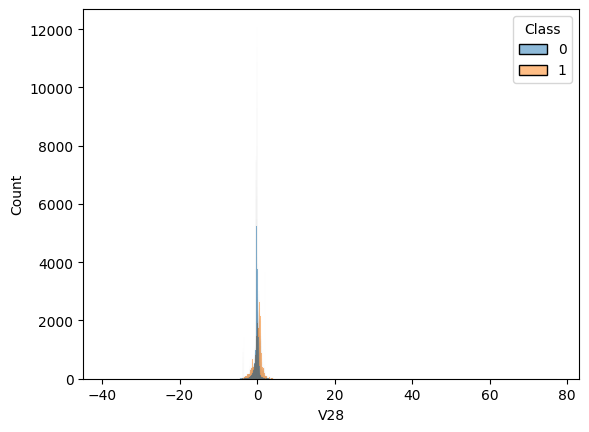

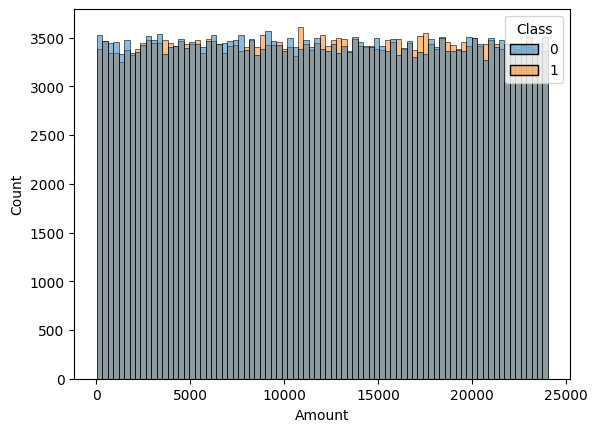

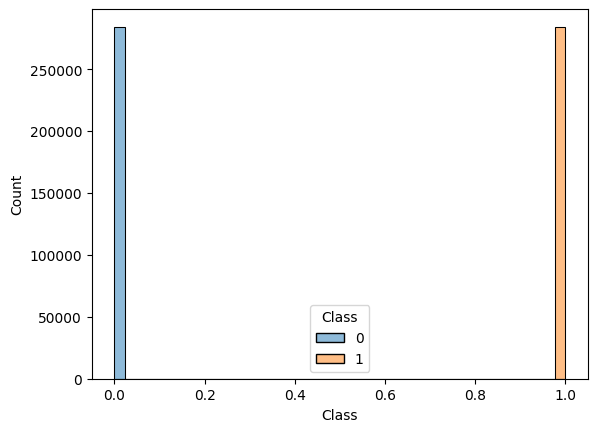

In [37]:
for col in df.columns:
  sns.histplot(data=df, x=col, hue='Class')
  plt.show()

Above plots show relation of columns with respect to Class.

**Model Building**

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
se=StandardScaler()
x_train = se.fit_transform(x_train)
x_test = se.fit_transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [41]:
y_pred_lr

array([1, 1, 0, ..., 1, 1, 1])

In [44]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy_score(y_test, y_pred_lr)

0.9655956714676797

In [45]:
print(classification_report(y_test, y_pred_lr))

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97     85149\n           1       0.98      0.95      0.97     85440\n\n    accuracy                           0.97    170589\n   macro avg       0.97      0.97      0.97    170589\nweighted avg       0.97      0.97      0.97    170589\n'

In [46]:
confusion_matrix(y_test, y_pred_lr)

array([[83407,  1742],
       [ 4127, 81313]])

In [47]:
scores = lr.scores_[1] # get scores for each fold and for each `C`
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [[0.95084727 0.9583841  0.96294389 0.96486578 0.96490347 0.9648909
  0.9648909  0.9648909  0.9648909  0.9648909 ]
 [0.9512863  0.95864737 0.96305648 0.96509145 0.96526731 0.96525475
  0.96530499 0.96530499 0.96529243 0.96530499]
 [0.95068335 0.95852176 0.96281781 0.96462667 0.96467692 0.96472716
  0.96470204 0.9647146  0.96470204 0.9647146 ]
 [0.95068335 0.9579188  0.96257914 0.96467692 0.96482766 0.96486534
  0.96490302 0.96490302 0.96490302 0.96490302]
 [0.94979148 0.95739122 0.96183801 0.96383529 0.96408652 0.96417445
  0.96414933 0.96414933 0.96414933 0.96414933]]


In [48]:
scores.min(), scores.mean(), scores.max()

(0.9497914782433926, 0.9624794929155296, 0.9653049944729173)

Decission Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred_dt = dt.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_dt)

0.9959727766737597

In [52]:
print(classification_report(y_test, y_pred_dt))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     85149\n           1       1.00      1.00      1.00     85440\n\n    accuracy                           1.00    170589\n   macro avg       1.00      1.00      1.00    170589\nweighted avg       1.00      1.00      1.00    170589\n'

In [53]:
confusion_matrix(y_test, y_pred_dt)

array([[84871,   278],
       [  409, 85031]])

Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred_rf=rf.predict(x_test)

In [56]:
accuracy_score(y_test, y_pred_rf)

0.9998710350608773

In [57]:
print(classification_report(y_test, y_pred_rf))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     85149\n           1       1.00      1.00      1.00     85440\n\n    accuracy                           1.00    170589\n   macro avg       1.00      1.00      1.00    170589\nweighted avg       1.00      1.00      1.00    170589\n'

In [58]:
confusion_matrix(y_test, y_pred_rf)

array([[85127,    22],
       [    0, 85440]])

Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb = gb.fit(x_train, y_train)

In [60]:
y_pred_gb = gb.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_gb)

0.9794183681245567

In [62]:
print(classification_report(y_test, y_pred_gb))

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98     85149\n           1       0.99      0.97      0.98     85440\n\n    accuracy                           0.98    170589\n   macro avg       0.98      0.98      0.98    170589\nweighted avg       0.98      0.98      0.98    170589\n'

In [63]:
confusion_matrix(y_test, y_pred_gb)

array([[84268,   881],
       [ 2630, 82810]])

SVM

In [64]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [65]:
y_pred_svm=svm.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svm)

0.9966058772839984

In [67]:
print(classification_report(y_test, y_pred_svm))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     85149\n           1       1.00      1.00      1.00     85440\n\n    accuracy                           1.00    170589\n   macro avg       1.00      1.00      1.00    170589\nweighted avg       1.00      1.00      1.00    170589\n'

In [68]:
confusion_matrix(y_test, y_pred_svm)

array([[84865,   284],
       [  295, 85145]])

ANN

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
# Build the ANN model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [72]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with 20 epochs
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test set
y_pred = (model.predict(x_test) > 0.5).astype("int32")

Epoch 1/20
6220/6220 [==============================] - 22s 3ms/step - loss: 0.0573 - accuracy: 0.9795 - val_loss: 0.0135 - val_accuracy: 0.9970
Epoch 2/20
6220/6220 [==============================] - 20s 3ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0080 - val_accuracy: 0.9984
Epoch 3/20
6220/6220 [==============================] - 21s 3ms/step - loss: 0.0139 - accuracy: 0.9962 - val_loss: 0.0065 - val_accuracy: 0.9986
Epoch 4/20
6220/6220 [==============================] - 20s 3ms/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0051 - val_accuracy: 0.9988
Epoch 5/20
6220/6220 [==============================] - 19s 3ms/step - loss: 0.0107 - accuracy: 0.9973 - val_loss: 0.0047 - val_accuracy: 0.9991
Epoch 6/20
6220/6220 [==============================] - 19s 3ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.0043 - val_accuracy: 0.9990
Epoch 7/20
6220/6220 [==============================] - 21s 3ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.0064 - val_ac

In [73]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report)

Accuracy: 0.9994724161581344
Confusion Matrix:
[[85059    90]
 [    0 85440]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [74]:
# prompt: model using xg boost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df.Class, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9997713803351916


Selecting models with high colinearity

In [75]:
df2.head()

,V1,V2,V3,V4,V9,V10,V11,V12,V14,V16,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.727159,0.637735,-0.987020,0.293438,0.549020,0.215598,0
1,0.985100,-0.356045,0.558056,-0.429654,0.347452,0.529808,0.140107,1.564246,0.627719,0.789188,0
2,-0.260272,-0.949385,1.728538,-0.457986,-0.261297,0.690708,-0.272985,0.659201,0.616874,-0.577514,0
3,-0.152152,-0.508959,1.746840,-1.090178,-0.205698,0.575231,-0.752581,0.737483,0.559535,-0.030669,0
4,-0.206820,-0.165280,1.527053,-0.448293,1.049921,0.968046,-1.203171,1.029577,0.241454,0.224538,0


In [76]:
x_train,x_test, y_train,y_test = train_test_split(df2.drop('Class',axis=1), df.Class ,test_size=0.3, random_state=30)

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred_dt = dt.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred_dt)

0.9970689786563026

In [101]:
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     85423\n           1       1.00      1.00      1.00     85166\n\n    accuracy                           1.00    170589\n   macro avg       1.00      1.00      1.00    170589\nweighted avg       1.00      1.00      1.00    170589\n'

In [86]:
confusion_matrix(y_test, y_pred_dt)

array([[85097,   326],
       [  174, 84992]])

Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
y_pred_rf=rf.predict(x_test)

In [89]:
accuracy_score(y_test, y_pred_rf)

0.9996365533533815

In [100]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85423
           1       1.00      1.00      1.00     85166

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [93]:
confusion_matrix(y_test, y_pred_rf)

array([[85365,    58],
       [    4, 85162]])

Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb = gb.fit(x_train, y_train)

In [95]:
y_pred_gb = gb.predict(x_test)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_gb)

0.9740721851936526

In [102]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85423
           1       0.98      0.96      0.97     85166

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



In [103]:
confusion_matrix(y_test, y_pred_gb)

array([[84031,  1392],
       [ 3031, 82135]])

SVM

In [104]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [105]:
 y_pred_svm=svm.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svm)

0.980596638704723

In [107]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     85423
           1       0.98      0.98      0.98     85166

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



In [108]:
confusion_matrix(y_test, y_pred_svm)

array([[84107,  1316],
       [ 1994, 83172]])

ANN

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
# Build the ANN model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [112]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with 20 epochs
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test set
y_pred = (model.predict(x_test) > 0.5).astype("int32")

Epoch 1/20
6220/6220 [==============================] - 19s 3ms/step - loss: 0.0934 - accuracy: 0.9654 - val_loss: 0.0564 - val_accuracy: 0.9779
Epoch 2/20
6220/6220 [==============================] - 19s 3ms/step - loss: 0.0638 - accuracy: 0.9760 - val_loss: 0.0400 - val_accuracy: 0.9835
Epoch 3/20
6220/6220 [==============================] - 20s 3ms/step - loss: 0.0541 - accuracy: 0.9798 - val_loss: 0.0363 - val_accuracy: 0.9857
Epoch 4/20
6220/6220 [==============================] - 18s 3ms/step - loss: 0.0495 - accuracy: 0.9816 - val_loss: 0.0310 - val_accuracy: 0.9880
Epoch 5/20
6220/6220 [==============================] - 18s 3ms/step - loss: 0.0474 - accuracy: 0.9826 - val_loss: 0.0291 - val_accuracy: 0.9898
Epoch 6/20
6220/6220 [==============================] - 18s 3ms/step - loss: 0.0453 - accuracy: 0.9834 - val_loss: 0.0267 - val_accuracy: 0.9910
Epoch 7/20
6220/6220 [==============================] - 18s 3ms/step - loss: 0.0433 - accuracy: 0.9841 - val_loss: 0.0258 - val_ac

In [114]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report)

Accuracy: 0.9939914062454203
Confusion Matrix:
[[84669   754]
 [  271 84895]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85423
           1       0.99      1.00      0.99     85166

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



Checking multicolinearity


In [115]:
x= df.corr().values
rows, cols = df.shape
flds = list(df.columns)
for i in range(cols):
    for j in range(i+1, cols):
        try:
            if x[i,j] > 0.6:
                print (flds[i], ' ', flds[j], ' ', x[i,j])
        except:
            continue

V1   V16   0.6218843218813161
V1   V17   0.6057987995629993
V3   V7   0.6343364195731893
V3   V9   0.6486148696013958
V3   V10   0.7076758294754224
V3   V12   0.7054965815551926
V3   V14   0.6731790018512175
V3   V16   0.614503523616856
V4   V11   0.7086423094474218
V4   Class   0.7359808565710273
V5   V17   0.6696247633075968
V5   V18   0.6450950823825486
V7   V9   0.6017887092598622
V7   V10   0.6780040510354747
V7   V12   0.603318095143748
V7   V16   0.6672439794919695
V7   V17   0.6557547245191322
V7   V18   0.6256803922390054
V9   V10   0.7484867020106862
V9   V12   0.6672655813962111
V9   V14   0.633212342507672
V10   V12   0.7367831820400966
V10   V14   0.6989394067917468
V10   V16   0.6866023339230601
V10   V17   0.6491491539838475
V11   Class   0.7242781571398379
V12   V14   0.7838777077741362
V12   V16   0.6984902814670928
V12   V17   0.6587385374736944
V14   V16   0.6305156380145103
V16   V17   0.8480951658049641
V16   V18   0.7679917806757725
V17   V18   0.8513662967516887


In [116]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df.Class, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9997713803351916


**Important Feature Selection**

In [121]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [125]:
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances.to_frame()})

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Use all features
selected_features = feature_importance_df['Feature']

# Subset the training and testing data based on selected features
X_train_selected = x_train[selected_features]
X_test_selected = x_test[selected_features]

model.fit(x_train_selected, y_train)

y_pred = model.predict(x_test_selected)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Module End Exam: Practical Machine Learning
Name: Shruti Gadhave
Roll No: 230940325054

Executive Summary:

The developed models demonstrate strong performance in identifying fraudulent transactions, with each model providing valuable insights into the dataset. Model selection and feature importance analysis aid in choosing the most effective models and features for fraud detection. The code provides a comprehensive approach to addressing the challenges associated with credit card fraud detection using machine learning techniques.

Code Flow Summary:

1. Data Loading and Inspection:
   - Read the dataset using Pandas.
   - Inspected the dataset's shape, columns, and information.
   - Checked for null values and duplicates.

2. Data Preprocessing:
   - Dropped the 'id' column as it is not relevant.
   - Explored and visualized correlation among features.
   - Checked for multicollinearity.
   - Removed highly correlated features.
   - Ensured no null or duplicate values in the dataset.

3. Data Visualization:
   - Utilized boxplots and histograms to visualize the distribution of each feature.
   - Plotted a pie chart to show the distribution of fraudulent and normal transactions.
   - Visualized transaction amounts using histograms.

4. Train-Test Split:
   - Split the data into training and testing sets using `train_test_split`.
   - Standardized features using `StandardScaler`.

5. Model Building and Evaluation:
   - Trained and evaluated the following models:
      - Logistic Regression
      - Decision Tree
      - Random Forest
      - Gradient Boosting
      - Support Vector Machines (SVM)
      - Artificial Neural Network (ANN)
   - Calculated accuracy, confusion matrix, and classification report for each model.

6. XGBoost Model:
   - Utilized XGBoost for feature importance analysis.
   - Trained and evaluated the XGBoost model.

7. Random Forest for Feature Selection:
   - Used RandomForest for feature importance and selection.
   - Evaluated model performance using selected features.


Sr. No	Model	Accuracy

__For all Columns__

1.		 Logistic Regression --> 0.9655956714676797

2.		Decision Tree --> 0.9959727766737597

3.		Random Forest	0.9998710350608773

4.		Gradient Boosting	0.9794183681245567

5.		Support Vector Machines (SVM)	0.9966058772839984

6.		Artificial Neural Network (ANN)	0.9994724161581344

7.	XG Boost	0.9997713803351916

__For medium to strong colinearity__

7.		 Logistic Regression	

8.		Decision Tree	9970689786563026

9.		Random Forest	0.9996365533533815

10.		Gradient Boosting	0.9740721851936526

11.		Support Vector Machines (SVM)	0.980596638704723

12.		Artificial Neural Network (ANN)	 0.9939914062454203

13.		XG Boost	0.9997713803351916

__Feature importance analyses__

14.		RandomForestClassifier	

15.		DecisionTreeClassifier	

